<a href="https://colab.research.google.com/github/nat13lla/Capstone/blob/main/datamanipulation/TrainTest_Split_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.tools
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
# Read in the dataframe from github
df = pd.read_csv("https://raw.githubusercontent.com/nat13lla/Capstone/main/data_files/ordered_data.csv")

# Train test Split

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,results_id,race_year,round,race_name,race_id,date_of_race,time_of_race,circuit_name,circuit_id,location,country,lat,lng,drivers_id,driverId,givenName,familyName,code,perm_number,driver_nationality,dob,constructors_id,constructorId,constructor_name,constructor_nationality,start_position,end_position,points_gained,race_status,laps_done,race_millis,race_time,fl_av_speed,fl_time,fl_lap_no,fl_rank,points_achieved
0,1,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,9,leclerc,Charles,Leclerc,LEC,16,Monegasque,1997-10-16,5,ferrari,Ferrari,Italian,1,1,26,Finished,57,5853584.0,1:37:33.584,206.018,1:34.570,51.0,1.0,1
1,2,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,16,sainz,Carlos,Sainz,SAI,55,Spanish,1994-09-01,5,ferrari,Ferrari,Italian,3,2,18,Finished,57,5859182.0,+5.598,203.501,1:35.740,52.0,3.0,1
2,3,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,6,hamilton,Lewis,Hamilton,HAM,44,British,1985-01-07,8,mercedes,Mercedes,German,5,3,15,Finished,57,5863259.0,+9.675,202.469,1:36.228,53.0,5.0,1
3,4,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,15,russell,George,Russell,RUS,63,British,1998-02-15,8,mercedes,Mercedes,German,9,4,12,Finished,57,5864795.0,+11.211,202.313,1:36.302,56.0,6.0,1
4,5,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,10,kevin_magnussen,Kevin,Magnussen,MAG,20,Danish,1992-10-05,6,haas,Haas F1 Team,American,7,5,10,Finished,57,5868338.0,+14.754,201.641,1:36.623,53.0,8.0,1


In [4]:
feature_cols = df.columns
feature_cols = list(feature_cols)
feature_cols.remove("points_achieved") # end_position or points_gained

In [5]:
X = df[feature_cols]
X = sm.add_constant(X)
y = df["points_achieved"]

In [6]:
X.head()

,const,results_id,race_year,round,race_name,race_id,date_of_race,time_of_race,circuit_name,circuit_id,location,country,lat,lng,drivers_id,driverId,givenName,familyName,code,perm_number,driver_nationality,dob,constructors_id,constructorId,constructor_name,constructor_nationality,start_position,end_position,points_gained,race_status,laps_done,race_millis,race_time,fl_av_speed,fl_time,fl_lap_no,fl_rank
0,1.0,1,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,9,leclerc,Charles,Leclerc,LEC,16,Monegasque,1997-10-16,5,ferrari,Ferrari,Italian,1,1,26,Finished,57,5853584.0,1:37:33.584,206.018,1:34.570,51.0,1.0
1,1.0,2,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,16,sainz,Carlos,Sainz,SAI,55,Spanish,1994-09-01,5,ferrari,Ferrari,Italian,3,2,18,Finished,57,5859182.0,+5.598,203.501,1:35.740,52.0,3.0
2,1.0,3,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,6,hamilton,Lewis,Hamilton,HAM,44,British,1985-01-07,8,mercedes,Mercedes,German,5,3,15,Finished,57,5863259.0,+9.675,202.469,1:36.228,53.0,5.0
3,1.0,4,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,15,russell,George,Russell,RUS,63,British,1998-02-15,8,mercedes,Mercedes,German,9,4,12,Finished,57,5864795.0,+11.211,202.313,1:36.302,56.0,6.0
4,1.0,5,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,10,kevin_magnussen,Kevin,Magnussen,MAG,20,Danish,1992-10-05,6,haas,Haas F1 Team,American,7,5,10,Finished,57,5868338.0,+14.754,201.641,1:36.623,53.0,8.0


We determined the proportion of the dataset that will be allocated to the testing set. In this case, test_size = 0.2 indicates that 20% of the data will be used for testing, and the remaining 80% will be used for training.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13, stratify = y)

# Feature Engineering

At this stage

In [8]:
# Function to map times to categories: AM/12-6/after6
def cat_time(time_str):
    hour = int(time_str.split(':')[0])
    if 00 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

In [9]:
# Function to map times to  the hour of the start time + . + min of the start time
def map_time(time_str):
    hour = int(time_str.split(':')[0])+int(time_str.split(':')[1])/100
    return hour

In [10]:
def feature_engineering(df):
  df = df.copy()
  # Combine first and second name to create a driver name column
  df['driver_name'] = df['givenName']+' '+df['familyName']
  # Add places Gained Column
  df['places_gained'] = df['start_position']-df['end_position']
  # Change 'date_of_race' from obj- > date
  df['date_of_race'] = pd.to_datetime(df['date_of_race'])
  # Extract month and Day as columns
  df['race_month'] = df['date_of_race'].dt.month
  df['race_day'] = df['date_of_race'].dt.day
  # Change 'dob' from obj- > time
  df['dob'] = pd.to_datetime(df['dob'])
  df['age_in_days'] = (df['date_of_race'] - df['dob']).dt.days
  # Apply Functions
  df['time_cat_of_race'] = df['time_of_race'].apply(cat_time)
  df['time_of_race'] = df['time_of_race'].apply(map_time)

  # Null Handling
  df['fl_time'].fillna(0, inplace=True)
  df['race_millis'].fillna(0, inplace=True)
  df['fl_av_speed'].fillna(0, inplace=True)
  df['fl_lap_no'].fillna(0, inplace=True)
  df['fl_rank'].fillna(20, inplace=True)


  # Dropping Columns:
  df = df.drop(['givenName','familyName','dob','date_of_race', 'driver_name', 'circuit_name', 'location'], axis = 1)
  # Remove the ID columns
  df = df.drop(['results_id', 'race_id', 'circuit_id','code', 'constructors_id' ], axis = 1)
  # Remove alternate id columns
  df = df.drop(['constructorId', 'driverId'], axis = 1)
  # Remove lat/lng
  df = df.drop(['lat', 'lng'], axis = 1)
  # Remove race_time as same as race_millis
  df = df.drop(['race_time'], axis = 1)

  # Need to sort these column to use
  df = df.drop(['fl_time'], axis = 1)
  df = df.drop(['race_status'], axis = 1)
  # df = df.drop(['code'], axis = 1)
  # df = df.drop(['driver_nationality'], axis = 1)

  # OHE
  df = pd.get_dummies(df, columns = ['race_name'], drop_first = True, prefix = 'race')
  df = pd.get_dummies(df, columns = ['country'], drop_first = True, prefix = 'country')
  # df = pd.get_dummies(df, columns = ['code'], drop_first = True, prefix = 'code')
  df = pd.get_dummies(df, columns = ['driver_nationality'], drop_first = True, prefix = 'dn')
  df = pd.get_dummies(df, columns = ['constructor_name'], drop_first = True, prefix = 'constructor')
  df = pd.get_dummies(df, columns = ['constructor_nationality'], drop_first = True, prefix = 'cn')
  # df = pd.get_dummies(df, columns = ['race_status'], drop_first = True, prefix = 'status')
  df = pd.get_dummies(df, columns = ['time_cat_of_race'], drop_first = True, prefix = 'time_category')

  # Removing columns that show points and end position
  df = df.drop(['points_gained', 'end_position'], axis = 1)

  return df

In [11]:
X_train_fe = feature_engineering(X_train)

In [12]:
# Download the Dataframe as CSV
X_train_fe.to_csv('FE_train_data.csv', index=False)

In [13]:
X_train_fe

,const,race_year,round,time_of_race,drivers_id,perm_number,start_position,laps_done,race_millis,fl_av_speed,fl_lap_no,fl_rank,places_gained,race_month,race_day,age_in_days,race_Australian Grand Prix,race_Austrian Grand Prix,race_Azerbaijan Grand Prix,race_Bahrain Grand Prix,race_Belgian Grand Prix,race_British Grand Prix,race_Canadian Grand Prix,race_Dutch Grand Prix,race_Emilia Romagna Grand Prix,race_French Grand Prix,race_Hungarian Grand Prix,race_Italian Grand Prix,race_Japanese Grand Prix,race_Las Vegas Grand Prix,race_Mexico City Grand Prix,race_Miami Grand Prix,race_Monaco Grand Prix,race_Qatar Grand Prix,race_Saudi Arabian Grand Prix,race_Singapore Grand Prix,race_Spanish Grand Prix,race_São Paulo Grand Prix,race_United States Grand Prix,country_Austria,country_Azerbaijan,country_Bahrain,country_Belgium,country_Brazil,country_Canada,country_France,country_Hungary,country_Italy,country_Japan,country_Mexico,country_Monaco,country_Netherlands,country_Qatar,country_Saudi Arabia,country_Singapore,country_Spain,country_UAE,country_UK,country_USA,country_United States,dn_Australian,dn_British,dn_Canadian,dn_Chinese,dn_Danish,dn_Dutch,dn_Finnish,dn_French,dn_German,dn_Japanese,dn_Mexican,dn_Monegasque,dn_New Zealander,dn_Spanish,dn_Thai,constructor_AlphaTauri,constructor_Alpine F1 Team,constructor_Aston Martin,constructor_Ferrari,constructor_Haas F1 Team,constructor_McLaren,constructor_Mercedes,constructor_RB F1 Team,constructor_Red Bull,constructor_Sauber,constructor_Williams,cn_Austrian,cn_British,cn_French,cn_German,cn_Italian,cn_Swiss,time_category_Evening,time_category_Morning
520,1.0,2023,5,19.3,20,33,9,57,5258241.0,217.184,56.0,1.0,8,5,7,9350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
361,1.0,2022,19,19.0,6,44,3,56,6136710.0,198.805,45.0,5.0,1,10,23,13803,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
556,1.0,2023,6,13.0,7,27,18,76,0.0,156.033,6.0,12.0,1,5,28,13066,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
534,1.0,2023,5,19.3,7,27,12,57,5333191.0,214.334,36.0,6.0,-3,5,7,13045,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
28,1.0,2022,2,17.0,10,20,10,50,5123601.0,239.562,48.0,6.0,1,3,27,10765,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1.0,2022,5,19.3,20,33,3,57,5664258.0,213.255,54.0,1.0,2,5,8,8986,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
350,1.0,2022,18,5.0,14,3,11,28,10976881.0,193.848,11.0,15.0,0,10,9,12153,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
539,1.0,2023,5,19.3,25,2,20,56,0.0,210.893,50.0,19.0,0,5,7,8162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
795,1.0,2023,18,19.0,2,14,0,49,0.0,198.559,47.0,7.0,-16,10,22,15425,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [14]:
X_train_fe.dtypes

const                    float64
race_year                  int64
round                      int64
time_of_race             float64
drivers_id                 int64
                          ...   
cn_German                  uint8
cn_Italian                 uint8
cn_Swiss                   uint8
time_category_Evening      uint8
time_category_Morning      uint8
Length: 94, dtype: object

# LOGREG base model

In [15]:
# Create a LogisticRegression() object.
lr = LogisticRegression(max_iter=1500, random_state=42)

In [16]:
# Fit the model on our data
lr.fit(X_train_fe, y_train)

LogisticRegression(max_iter=1500, random_state=42)

In [17]:
# Make our prediction and Let's store them in 2 columns
X_train_fe[['prob_points','prob_no_points']] = lr.predict_proba(X_train_fe)

In [18]:
# Set that if prob_no_points > .5 then 0; else 1
X_train_fe['y_pred'] = np.where(X_train_fe['prob_no_points']>.5, 1, 0)

In [19]:
# Using the 'metrics' module from sklearn

def get_results(actual, predicted):
    print("The confusion matrix for the Points predictions is:")
    print(metrics.confusion_matrix(predicted, actual), "\n")
    print(f'The accuracy of the Points prediction model is: {metrics.accuracy_score(predicted, actual)}')
    print(f'The recall of the Points prediction model is: {metrics.recall_score(predicted, actual)}')
    print(f'The precision of the Points prediction model is: {metrics.precision_score(predicted, actual)}')
    print(f'The F1-score of the Points prediction model is: {metrics.f1_score(predicted, actual)}')

In [20]:
## Now, we simply apply the function on our predictions
get_results(y_train, X_train_fe['y_pred'])

The confusion matrix for the Points predictions is:
[[240  18]
 [128 349]] 

The accuracy of the Points prediction model is: 0.8013605442176871
The recall of the Points prediction model is: 0.7316561844863732
The precision of the Points prediction model is: 0.9509536784741145
The F1-score of the Points prediction model is: 0.8270142180094786


In [21]:
# Check the classification report
print(metrics.classification_report(y_train, X_train_fe['y_pred']))

              precision    recall  f1-score   support

           0       0.93      0.65      0.77       368
           1       0.73      0.95      0.83       367

    accuracy                           0.80       735
   macro avg       0.83      0.80      0.80       735
weighted avg       0.83      0.80      0.80       735



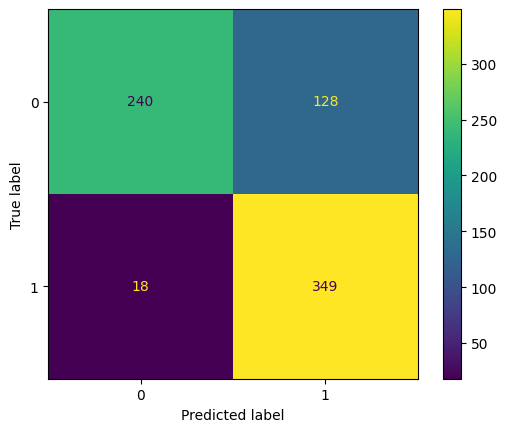

In [22]:
# Displaying the confusion matrix!
conf = metrics.confusion_matrix(y_train, X_train_fe['y_pred'])
metrics.ConfusionMatrixDisplay(conf).plot()
plt.show()

## Check test data

In [23]:
# FE to the test data
X_test_fe = feature_engineering(X_test)

In [24]:
# Make our prediction
X_test_fe[['prob_points','prob_no_points']] = lr.predict_proba(X_test_fe)

In [25]:
X_test_fe['y_pred'] = np.where(X_test_fe['prob_no_points']>.5, 1, 0)

In [26]:
get_results(y_test, X_test_fe['y_pred'])

The confusion matrix for the Points predictions is:
[[60  2]
 [32 90]] 

The accuracy of the Points prediction model is: 0.8152173913043478
The recall of the Points prediction model is: 0.7377049180327869
The precision of the Points prediction model is: 0.9782608695652174
The F1-score of the Points prediction model is: 0.8411214953271028


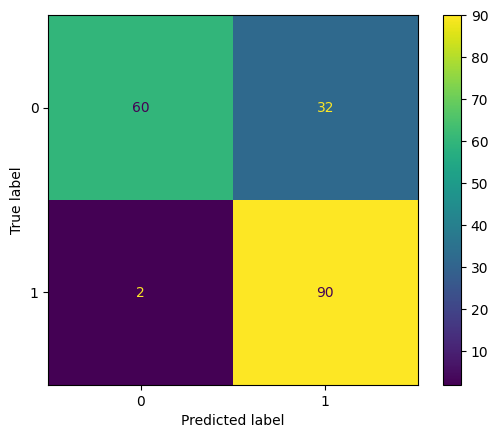

In [27]:
# Displaying the confusion matrix!
conf = metrics.confusion_matrix(y_test, X_test_fe['y_pred'])
metrics.ConfusionMatrixDisplay(conf).plot()
plt.show()

# Feature Selection - Vif

In [28]:
X_train_fe.columns

Index(['const', 'race_year', 'round', 'time_of_race', 'drivers_id',
       'perm_number', 'start_position', 'laps_done', 'race_millis',
       'fl_av_speed', 'fl_lap_no', 'fl_rank', 'places_gained', 'race_month',
       'race_day', 'age_in_days', 'race_Australian Grand Prix',
       'race_Austrian Grand Prix', 'race_Azerbaijan Grand Prix',
       'race_Bahrain Grand Prix', 'race_Belgian Grand Prix',
       'race_British Grand Prix', 'race_Canadian Grand Prix',
       'race_Dutch Grand Prix', 'race_Emilia Romagna Grand Prix',
       'race_French Grand Prix', 'race_Hungarian Grand Prix',
       'race_Italian Grand Prix', 'race_Japanese Grand Prix',
       'race_Las Vegas Grand Prix', 'race_Mexico City Grand Prix',
       'race_Miami Grand Prix', 'race_Monaco Grand Prix',
       'race_Qatar Grand Prix', 'race_Saudi Arabian Grand Prix',
       'race_Singapore Grand Prix', 'race_Spanish Grand Prix',
       'race_São Paulo Grand Prix', 'race_United States Grand Prix',
       'country_Austria

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # a module to evaluate the (VIF)

cols = ['const', 'race_year', 'round', 'time_of_race', 'drivers_id',
       'perm_number', 'start_position', 'laps_done', 'race_millis',
       'fl_av_speed', 'fl_lap_no', 'fl_rank', 'places_gained', 'race_month',
       'race_day', 'age_in_days', 'race_Australian Grand Prix',
       'race_Austrian Grand Prix', 'race_Azerbaijan Grand Prix',
       'race_Bahrain Grand Prix', 'race_Belgian Grand Prix',
       'race_British Grand Prix', 'race_Canadian Grand Prix',
       'race_Dutch Grand Prix', 'race_Emilia Romagna Grand Prix',
       'race_French Grand Prix', 'race_Hungarian Grand Prix',
       'race_Italian Grand Prix', 'race_Japanese Grand Prix',
       'race_Las Vegas Grand Prix', 'race_Mexico City Grand Prix',
       'race_Miami Grand Prix', 'race_Monaco Grand Prix',
       'race_Qatar Grand Prix', 'race_Saudi Arabian Grand Prix',
       'race_Singapore Grand Prix', 'race_Spanish Grand Prix',
       'race_São Paulo Grand Prix', 'race_United States Grand Prix',
       'country_Austria', 'country_Azerbaijan', 'country_Bahrain',
       'country_Belgium', 'country_Brazil', 'country_Canada', 'country_France',
       'country_Hungary', 'country_Italy', 'country_Japan', 'country_Mexico',
       'country_Monaco', 'country_Netherlands', 'country_Qatar',
       'country_Saudi Arabia', 'country_Singapore', 'country_Spain',
       'country_UAE', 'country_UK', 'country_USA', 'country_United States',
       'dn_Australian', 'dn_British', 'dn_Canadian', 'dn_Chinese', 'dn_Danish',
       'dn_Dutch', 'dn_Finnish', 'dn_French', 'dn_German', 'dn_Japanese',
       'dn_Mexican', 'dn_Monegasque', 'dn_New Zealander', 'dn_Spanish',
       'dn_Thai', 'constructor_AlphaTauri', 'constructor_Alpine F1 Team',
       'constructor_Aston Martin', 'constructor_Ferrari',
       'constructor_Haas F1 Team', 'constructor_McLaren',
       'constructor_Mercedes', 'constructor_RB F1 Team',
       'constructor_Red Bull', 'constructor_Sauber', 'constructor_Williams',
       'cn_Austrian', 'cn_British', 'cn_French', 'cn_German', 'cn_Italian',
       'cn_Swiss', 'time_category_Evening', 'time_category_Morning',
       'prob_points', 'prob_no_points', 'y_pred']

# Create an indexed list (a series) where we list the VIF of each of the columns. Note the use of '.shape' in the second part of the loop
pd.Series([variance_inflation_factor(X_train_fe[cols].values, i) for i in range(X_train_fe[cols].shape[1])], index = X_train_fe[cols].columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide

const                      0.000000
race_year                  3.681628
round                    389.279109
time_of_race                    inf
drivers_id                60.936486
                            ...    
time_category_Evening           inf
time_category_Morning           inf
prob_points                     inf
prob_no_points                  inf
y_pred                    24.948995
Length: 97, dtype: float64

In [36]:
## This a piece of code from stats.stackexchange.com
## It runs the model with all the variables.
## If any of them have a higher VIF than 5, it drops the max.
## Then it keeps going until none of them have a higher VIF than 5.
## This leaves us with a nice set of features with no collineraity

def calculate_vif(X, thresh = 5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif)) # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    print('Remaining variables:')
    print(X.columns[variables]) # finally, we print the variables that are still in our set
    return X.iloc[:, variables] # and return our X cut down to the remaining variables

In [37]:
# Calculating the VIF
calculate_vif(X_train_fe[['const', 'race_year', 'round', 'time_of_race', 'drivers_id',
       'perm_number', 'start_position', 'laps_done', 'race_millis',
       'fl_av_speed', 'fl_lap_no', 'fl_rank', 'places_gained', 'race_month',
       'race_day', 'age_in_days', 'race_Australian Grand Prix',
       'race_Austrian Grand Prix', 'race_Azerbaijan Grand Prix',
       'race_Bahrain Grand Prix', 'race_Belgian Grand Prix',
       'race_British Grand Prix', 'race_Canadian Grand Prix',
       'race_Dutch Grand Prix', 'race_Emilia Romagna Grand Prix',
       'race_French Grand Prix', 'race_Hungarian Grand Prix',
       'race_Italian Grand Prix', 'race_Japanese Grand Prix',
       'race_Las Vegas Grand Prix', 'race_Mexico City Grand Prix',
       'race_Miami Grand Prix', 'race_Monaco Grand Prix',
       'race_Qatar Grand Prix', 'race_Saudi Arabian Grand Prix',
       'race_Singapore Grand Prix', 'race_Spanish Grand Prix',
       'race_São Paulo Grand Prix', 'race_United States Grand Prix',
       'country_Austria', 'country_Azerbaijan', 'country_Bahrain',
       'country_Belgium', 'country_Brazil', 'country_Canada', 'country_France',
       'country_Hungary', 'country_Italy', 'country_Japan', 'country_Mexico',
       'country_Monaco', 'country_Netherlands', 'country_Qatar',
       'country_Saudi Arabia', 'country_Singapore', 'country_Spain',
       'country_UAE', 'country_UK', 'country_USA', 'country_United States',
       'dn_Australian', 'dn_British', 'dn_Canadian', 'dn_Chinese', 'dn_Danish',
       'dn_Dutch', 'dn_Finnish', 'dn_French', 'dn_German', 'dn_Japanese',
       'dn_Mexican', 'dn_Monegasque', 'dn_New Zealander', 'dn_Spanish',
       'dn_Thai', 'constructor_AlphaTauri', 'constructor_Alpine F1 Team',
       'constructor_Aston Martin', 'constructor_Ferrari',
       'constructor_Haas F1 Team', 'constructor_McLaren',
       'constructor_Mercedes', 'constructor_RB F1 Team',
       'constructor_Red Bull', 'constructor_Sauber', 'constructor_Williams',
       'cn_Austrian', 'cn_British', 'cn_French', 'cn_German', 'cn_Italian',
       'cn_Swiss', 'time_category_Evening', 'time_category_Morning',
       'prob_points', 'prob_no_points', 'y_pred']])

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


dropping 'time_of_race' at index: 3
dropping 'race_Australian Grand Prix' at index: 15
dropping 'race_Austrian Grand Prix' at index: 15
dropping 'race_Azerbaijan Grand Prix' at index: 15
dropping 'race_Bahrain Grand Prix' at index: 15
dropping 'race_Belgian Grand Prix' at index: 15
dropping 'race_British Grand Prix' at index: 15
dropping 'race_Canadian Grand Prix' at index: 15
dropping 'race_Dutch Grand Prix' at index: 15
dropping 'race_Emilia Romagna Grand Prix' at index: 15
dropping 'race_French Grand Prix' at index: 15
dropping 'race_Hungarian Grand Prix' at index: 15
dropping 'race_Japanese Grand Prix' at index: 16
dropping 'race_Las Vegas Grand Prix' at index: 16
dropping 'race_Mexico City Grand Prix' at index: 16
dropping 'race_Miami Grand Prix' at index: 16
dropping 'race_Monaco Grand Prix' at index: 16
dropping 'race_Qatar Grand Prix' at index: 16
dropping 'race_Saudi Arabian Grand Prix' at index: 16
dropping 'race_Singapore Grand Prix' at index: 16
dropping 'race_Spanish Grand

,race_millis,places_gained,race_Italian Grand Prix,race_United States Grand Prix,country_Azerbaijan,country_Bahrain,country_Belgium,country_Brazil,country_Canada,country_France,country_Hungary,country_Italy,country_Japan,country_Mexico,country_Monaco,country_Netherlands,country_Qatar,country_Saudi Arabia,country_Singapore,country_Spain,country_UAE,country_UK,country_USA,country_United States,dn_Australian,dn_Canadian,dn_Danish,dn_Dutch,dn_Finnish,dn_French,dn_German,dn_Japanese,dn_Mexican,dn_Monegasque,dn_New Zealander,dn_Spanish,dn_Thai,constructor_Ferrari,constructor_McLaren,constructor_RB F1 Team,constructor_Sauber,constructor_Williams,cn_French,cn_German,cn_Swiss
520,5258241.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
361,6136710.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
556,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
534,5333191.0,-3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,5123601.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,5664258.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
350,10976881.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
539,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
795,0.0,-16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Train

In [43]:
# vif_features = X_train_fe[['race_millis', 'places_gained', 'race_Italian Grand Prix',
#        'race_United States Grand Prix', 'country_Azerbaijan',
#        'country_Bahrain', 'country_Belgium', 'country_Brazil',
#        'country_Canada', 'country_France', 'country_Hungary', 'country_Italy',
#        'country_Japan', 'country_Mexico', 'country_Monaco',
#        'country_Netherlands', 'country_Qatar', 'country_Saudi Arabia',
#        'country_Singapore', 'country_Spain', 'country_UAE', 'country_UK',
#        'country_USA', 'country_United States', 'dn_Australian', 'dn_Canadian',
#        'dn_Danish', 'dn_Dutch', 'dn_Finnish', 'dn_French', 'dn_German',
#        'dn_Japanese', 'dn_Mexican', 'dn_Monegasque', 'dn_New Zealander',
#        'dn_Spanish', 'dn_Thai', 'constructor_Ferrari', 'constructor_McLaren',
#        'constructor_RB F1 Team', 'constructor_Sauber', 'constructor_Williams',
#        'cn_French', 'cn_German', 'cn_Swiss']].copy()

In [84]:
# removing 'race_millis', 'places_gained'
vif_features = X_train_fe[['start_position', 'race_Italian Grand Prix',
       'race_United States Grand Prix', 'country_Azerbaijan',
       'country_Bahrain', 'country_Belgium', 'country_Brazil',
       'country_Canada', 'country_France', 'country_Hungary', 'country_Italy',
       'country_Japan', 'country_Mexico', 'country_Monaco',
       'country_Netherlands', 'country_Qatar', 'country_Saudi Arabia',
       'country_Singapore', 'country_Spain', 'country_UAE', 'country_UK',
       'country_USA', 'country_United States', 'dn_Australian', 'dn_Canadian',
       'dn_Danish', 'dn_Dutch', 'dn_Finnish', 'dn_French', 'dn_German',
       'dn_Japanese', 'dn_Mexican', 'dn_Monegasque', 'dn_New Zealander',
       'dn_Spanish', 'dn_Thai', 'constructor_Ferrari', 'constructor_McLaren',
       'constructor_RB F1 Team', 'constructor_Sauber', 'constructor_Williams',
       'cn_French', 'cn_German', 'cn_Swiss']].copy()

In [85]:
lr2 = LogisticRegression(max_iter=1050, random_state=42)

In [86]:
# Fit the model on our data
lr2.fit(vif_features, y_train)

LogisticRegression(max_iter=1050, random_state=42)

In [87]:
# Make our prediction and Let's store them in 2 columns
vif_features[['prob_points','prob_no_points']] = lr2.predict_proba(vif_features)

In [88]:
# Set that if prob_no_points > .5 then 0; else 1
vif_features['y_pred'] = np.where(vif_features['prob_no_points']>.5, 1, 0)

In [73]:
# Now, we simply apply the function on our predictions
get_results(y_train, vif_features['y_pred'])

The confusion matrix for the Points predictions is:
[[282  85]
 [ 86 282]] 

The accuracy of the Points prediction model is: 0.7673469387755102
The recall of the Points prediction model is: 0.7663043478260869
The precision of the Points prediction model is: 0.7683923705722071
The F1-score of the Points prediction model is: 0.7673469387755101


In [89]:
# Check the classification report
print(metrics.classification_report(y_train, vif_features['y_pred']))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       368
           1       0.77      0.77      0.77       367

    accuracy                           0.77       735
   macro avg       0.77      0.77      0.77       735
weighted avg       0.77      0.77      0.77       735



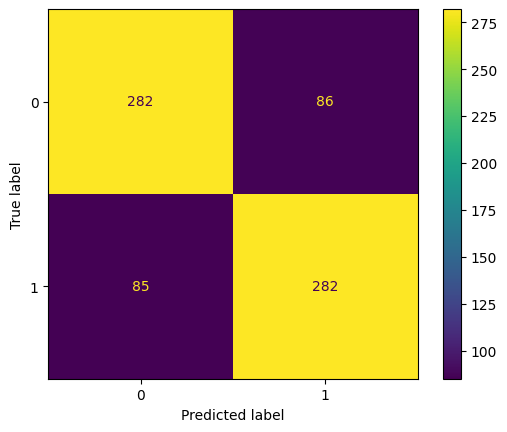

In [90]:
# Displaying the confusion matrix!
conf = metrics.confusion_matrix(y_train, vif_features['y_pred'])
metrics.ConfusionMatrixDisplay(conf).plot()
plt.show()

## Test

In [91]:
vif_features_test = X_test_fe[['start_position','race_Italian Grand Prix',
       'race_United States Grand Prix', 'country_Azerbaijan',
       'country_Bahrain', 'country_Belgium', 'country_Brazil',
       'country_Canada', 'country_France', 'country_Hungary', 'country_Italy',
       'country_Japan', 'country_Mexico', 'country_Monaco',
       'country_Netherlands', 'country_Qatar', 'country_Saudi Arabia',
       'country_Singapore', 'country_Spain', 'country_UAE', 'country_UK',
       'country_USA', 'country_United States', 'dn_Australian', 'dn_Canadian',
       'dn_Danish', 'dn_Dutch', 'dn_Finnish', 'dn_French', 'dn_German',
       'dn_Japanese', 'dn_Mexican', 'dn_Monegasque', 'dn_New Zealander',
       'dn_Spanish', 'dn_Thai', 'constructor_Ferrari', 'constructor_McLaren',
       'constructor_RB F1 Team', 'constructor_Sauber', 'constructor_Williams',
       'cn_French', 'cn_German', 'cn_Swiss']].copy()

In [75]:
#lr3 = LogisticRegression(max_iter=1050, random_state=42)

In [93]:
# Fit the model on our data
##lr3.fit(vif_features_test, y_test)

In [92]:
# Make our prediction and Let's store them in 2 columns
vif_features_test[['prob_points','prob_no_points']] = lr2.predict_proba(vif_features_test)

In [94]:
# Set that if prob_no_points > .5 then 0; else 1
vif_features_test['y_pred'] = np.where(vif_features_test['prob_no_points']>.5, 1, 0)

In [95]:
# Now, we simply apply the function on our predictions
get_results(y_test, vif_features_test['y_pred'])

The confusion matrix for the Points predictions is:
[[70 24]
 [22 68]] 

The accuracy of the Points prediction model is: 0.75
The recall of the Points prediction model is: 0.7555555555555555
The precision of the Points prediction model is: 0.7391304347826086
The F1-score of the Points prediction model is: 0.7472527472527473


In [96]:
# Check the classification report
print(metrics.classification_report(y_test, vif_features_test['y_pred']))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        92
           1       0.76      0.74      0.75        92

    accuracy                           0.75       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.75      0.75      0.75       184



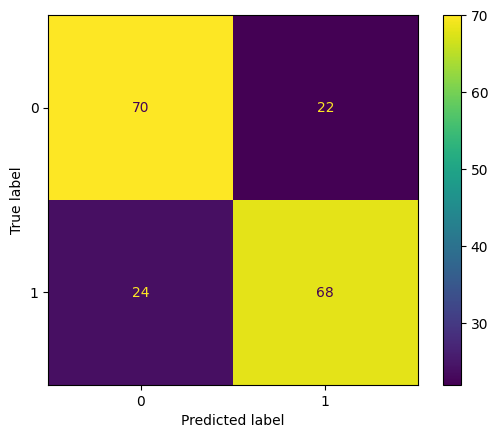

In [97]:
# Displaying the confusion matrix!
conf = metrics.confusion_matrix(y_test, vif_features_test['y_pred'])
metrics.ConfusionMatrixDisplay(conf).plot()
plt.show()

# Concept Interface

'start_position','race_Italian Grand Prix', 'race_United States Grand Prix', 'country_Azerbaijan', 'country_Bahrain', 'country_Belgium', 'country_Brazil', 'country_Canada', 'country_France', 'country_Hungary', 'country_Italy', 'country_Japan', 'country_Mexico', 'country_Monaco','country_Netherlands', 'country_Qatar', 'country_Saudi Arabia',
'country_Singapore', 'country_Spain', 'country_UAE', 'country_UK',
'country_USA', 'country_United States', 'dn_Australian', 'dn_Canadian',
'dn_Danish', 'dn_Dutch', 'dn_Finnish', 'dn_French', 'dn_German',
'dn_Japanese', 'dn_Mexican', 'dn_Monegasque', 'dn_New Zealander',
'dn_Spanish', 'dn_Thai', 'constructor_Ferrari', 'constructor_McLaren',
'constructor_RB F1 Team', 'constructor_Sauber', 'constructor_Williams',
'cn_French', 'cn_German', 'cn_Swiss'

In [80]:
columns = ['start_position','race_Italian Grand Prix', 'race_United States Grand Prix',
           'country_Azerbaijan', 'country_Bahrain', 'country_Belgium', 'country_Brazil',
           'country_Canada', 'country_France', 'country_Hungary', 'country_Italy',
           'country_Japan', 'country_Mexico', 'country_Monaco','country_Netherlands',
           'country_Qatar', 'country_Saudi Arabia', 'country_Singapore',
           'country_Spain', 'country_UAE', 'country_UK', 'country_USA',
           'country_United States', 'dn_Australian', 'dn_Canadian', 'dn_Danish',
           'dn_Dutch', 'dn_Finnish', 'dn_French', 'dn_German', 'dn_Japanese',
           'dn_Mexican', 'dn_Monegasque', 'dn_New Zealander', 'dn_Spanish',
           'dn_Thai', 'constructor_Ferrari', 'constructor_McLaren',
           'constructor_RB F1 Team', 'constructor_Sauber', 'constructor_Williams',
           'cn_French', 'cn_German', 'cn_Swiss']
data = pd.DataFrame(columns=columns)

In [81]:
def driver_input(year):
  if year == 2022:
    print("1: albon, 2: alonso, 3: bottas, 5: gasly, 6: hamilton, 7: hulkenberg, 8: latifi, 9: leclerc, 10: kevin_magnussen, 11: norris, 12: ocon, 13: perez, 14: ricciardo, 15: russell, 16: sainz, 17: mick_schumacher, 18: stroll, 19: tsunoda, 20: max_verstappen, 21: vettel, 22: zhou")
  elif year == 2023:
    print("1: albon, 2: alonso, 3: bottas, 4: de_vries, 5: gasly, 6: hamilton, 7: hulkenberg, 9: leclerc, 10: kevin_magnussen, 11: norris, 12: ocon, 13: perez, 14: ricciardo, 15: russell, 16: sainz,  18: stroll, 19: tsunoda, 20: max_verstappen, 22: zhou, 23: lawson, 24: piastri, 25: sargeant")
  elif year == 2024:
    print("1: albon, 2: alonso, 3: bottas, 5: gasly, 6: hamilton, 7: hulkenberg, 9: leclerc, 10: kevin_magnussen, 11: norris, 12: ocon, 13: perez, 14: ricciardo, 15: russell, 16: sainz,  18: stroll, 19: tsunoda, 20: max_verstappen, 22: zhou, 24: piastri, 25: sargeant")
  else:
    return('Error! Invalid year please restart to try again')

  driver = int(input("Please enter your chosen driver number: "))
  if driver < 1 or driver > 25:
    return("Error! Invalid driver please restart to try again")

  return driver

In [30]:
def track_input(year):
  if year == 2022:
    print("1: Abu Dhabi Grand Prix, 2: Australian Grand Prix, 3: Austrian Grand Prix, 4: Azerbaijan Grand Prix, 5: Bahrain Grand Prix, 6: Belgian Grand Prix, 7: British Grand Prix, 8: Canadian Grand Prix, 9: Dutch Grand Prix, 10: Emilia Romagna Grand Prix, 11: French Grand Prix, 12: Hungarian Grand Prix, 13: Italian Grand Prix, 14: Japanese Grand Prix, 15: Mexico City Grand Prix, 16: Miami Grand Prix, 17: Monaco Grand Prix, 18: Saudi Arabian Grand Prix, 19: São Paulo Grand Prix, 20: Singapore Grand Prix, 21: Spanish Grand Prix, 22: United States Grand Prix")
  elif year == 2023:
    print("1: Abu Dhabi Grand Prix, 2: Australian Grand Prix, 3: Austrian Grand Prix, 4: Azerbaijan Grand Prix, 5: Bahrain Grand Prix, 6: Belgian Grand Prix, 7: British Grand Prix, 8: Canadian Grand Prix, 9: Dutch Grand Prix, 12: Hungarian Grand Prix, 13: Italian Grand Prix, 14: Japanese Grand Prix, 23:Las Vegas Grand Prix, 15: Mexico City Grand Prix, 16: Miami Grand Prix, 17: Monaco Grand Prix, 24:Qatar Grand Prix, 18: Saudi Arabian Grand Prix, 19: São Paulo Grand Prix, 20:Singapore Grand Prix, 21: Spanish Grand Prix, 22: United States Grand Prix")
  elif year == 2024:
    print("5: Bahrain Grand Prix, 18: Saudi Arabian Grand Prix")
  else:
    return('Error! Invalid year please restart to try again')

  track = int(input("Please enter your chosen Track number: "))

  # Start with all tracks 0
  race_Australian = 0
  race_Austrian = 0
  race_Azerbaijan = 0
  race_Bahrain = 0
  race_Belgian = 0
  race_British = 0
  race_Canadian = 0
  race_Dutch = 0
  race_Emilia = 0
  race_French = 0
  race_Hungarian = 0
  race_Italian = 0
  race_Japanese = 0
  race_Las_Vegas = 0
  race_Mexico = 0
  race_Miami = 0
  race_Monaco = 0
  race_Qatar = 0
  race_Saudi = 0
  race_Singapore = 0
  race_Spanish = 0
  race_São_Paulo = 0
  race_United_States = 0

  if track == 2:
      race_Australian = 1
  elif track == 3:
      race_Austrian = 1
  elif track == 4:
      race_Azerbaijan = 1
  elif track == 5:
      race_Bahrain = 1
  elif track == 6:
      race_Belgian = 1
  elif track == 7:
      race_British = 1
  elif track == 8:
      race_Canadian = 1
  elif track == 9:
      race_Dutch = 1
  elif track == 10:
      race_Emilia = 1
  elif track == 11:
      race_French = 1
  elif track == 12:
      race_Hungarian = 1
  elif track == 13:
      race_Italian = 1
  elif track == 14:
      race_Japanese = 1
  elif track == 23:
      race_Las_Vegas = 1
  elif track == 15:
      race_Mexico = 1
  elif track == 16:
      race_Miami = 1
  elif track == 17:
      race_Monaco = 1
  elif track == 24:
      race_Qatar = 1
  elif track == 18:
      race_Saudi = 1
  elif track == 20:
      race_Singapore = 1
  elif track == 21:
      race_Spanish = 1
  elif track == 19:
      race_São_Paulo = 1
  elif track == 22:
      race_United_States = 1
  else:
    ()

  return track

In [31]:
X_train.loc[X_train['race_year'] == 2023, 'race_name'].value_counts()

Spanish Grand Prix          19
São Paulo Grand Prix        18
Monaco Grand Prix           18
Miami Grand Prix            17
Hungarian Grand Prix        17
Mexico City Grand Prix      17
British Grand Prix          16
Singapore Grand Prix        16
United States Grand Prix    16
Dutch Grand Prix            16
Italian Grand Prix          16
Azerbaijan Grand Prix       16
Bahrain Grand Prix          16
Las Vegas Grand Prix        15
Qatar Grand Prix            15
Canadian Grand Prix         15
Australian Grand Prix       15
Japanese Grand Prix         15
Abu Dhabi Grand Prix        14
Saudi Arabian Grand Prix    14
Belgian Grand Prix          14
Austrian Grand Prix         12
Name: race_name, dtype: int64

In [32]:
def predict_points():
  print('This model requires Several inputs, please enter one of the options when prompted: ')

  print("Options: 2022, 2023, 2024")
  year = int(input("Please input your chosen Season: "))
  if year < 2022 or year > 2024:
    return("Error! Invalid year please restart to try again")

  # Track Input
  track_input(year)

  # Driver Input
  driver_input(year)

  # Start position input
  start = int(input("Please input your chosen Driver's start position (1-20): "))
  if start < 1 or start > 20:
    return("Error! Start position must be between 1 and 20. Please restart to try again")


  # Output
  print("")

In [82]:
predict_points()

This model requires Several inputs, please enter one of the options when prompted: 
Options: 2022, 2023, 2024
Please input your chosen Season: 2022
1: Abu Dhabi Grand Prix, 2: Australian Grand Prix, 3: Austrian Grand Prix, 4: Azerbaijan Grand Prix, 5: Bahrain Grand Prix, 6: Belgian Grand Prix, 7: British Grand Prix, 8: Canadian Grand Prix, 9: Dutch Grand Prix, 10: Emilia Romagna Grand Prix, 11: French Grand Prix, 12: Hungarian Grand Prix, 13: Italian Grand Prix, 14: Japanese Grand Prix, 15: Mexico City Grand Prix, 16: Miami Grand Prix, 17: Monaco Grand Prix, 18: Saudi Arabian Grand Prix, 19: São Paulo Grand Prix, 20: Singapore Grand Prix, 21: Spanish Grand Prix, 22: United States Grand Prix
Please enter your chosen Track number: 2
1: albon, 2: alonso, 3: bottas, 5: gasly, 6: hamilton, 7: hulkenberg, 8: latifi, 9: leclerc, 10: kevin_magnussen, 11: norris, 12: ocon, 13: perez, 14: ricciardo, 15: russell, 16: sainz, 17: mick_schumacher, 18: stroll, 19: tsunoda, 20: max_verstappen, 21: vet